In [84]:
# importing libaries
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import pandas as pd
import math as math

In [85]:
#read data 
data = pd.read_csv('Almeria_Airp_-hour.dat',delimiter='\t')
data = data[1:].astype(float)
data.Ta +=273.15 #convert to Kelvin
data['date_time'] = pd.to_datetime({'year':2022,'month':data.m,'day':data.dofm,'hour':data.hi})
count = (data['FF'] == 0).sum()
count

np.int64(2)

In [86]:
data2 = pd.read_csv('Almeria_Airp_-hour2.dat')
data2.describe()

,y,m,dm,h,G_Gh,G_Dh,Ta,G_Lup,G_Bh,FF,...,PAR,G_Bn,RH,N,hs,G_Lv,Az,DD,dy,hy
count,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2005.0,6.526027,15.720548,12.500000,208.565068,75.487215,18.620297,414.843950,133.077511,3.919840,...,90.024087,226.025799,65.482763,2.101142,16.254760,386.964840,-15.814429,193.427968,183.000000,4380.500000
std,0.0,3.448048,8.796749,6.922582,282.384777,103.250245,5.994397,45.025139,200.553007,2.390256,...,121.624157,294.969461,13.843495,2.625161,21.364171,35.540009,98.874553,100.811352,105.372043,2528.938512
min,2005.0,1.000000,1.000000,1.000000,0.000000,0.000000,4.900000,325.000000,0.000000,0.000000,...,0.000000,0.000000,32.000000,0.000000,0.000000,305.000000,-176.300000,0.000000,1.000000,1.000000
25%,2005.0,4.000000,8.000000,6.750000,0.000000,0.000000,14.000000,380.000000,0.000000,2.100000,...,0.000000,0.000000,55.000000,0.000000,0.000000,359.000000,-101.100000,121.000000,92.000000,2190.750000
50%,2005.0,7.000000,16.000000,12.500000,3.000000,3.000000,18.200000,410.000000,0.000000,3.500000,...,2.000000,0.000000,65.000000,1.000000,0.500000,383.000000,-27.300000,190.000000,183.000000,4380.500000
75%,2005.0,10.000000,23.000000,18.250000,406.000000,130.000000,23.000000,442.000000,241.000000,5.300000,...,175.000000,505.000000,76.000000,4.000000,30.225000,413.000000,79.500000,286.000000,274.000000,6570.250000
max,2005.0,12.000000,31.000000,24.000000,1021.000000,477.000000,38.000000,588.000000,904.000000,15.100000,...,435.000000,1027.000000,100.000000,8.000000,76.000000,502.000000,154.500000,360.000000,365.000000,8760.000000


In [87]:
'''dofm: day of month
    dofy: day of the year
    hi: hour of the day
    Ta: temperature of air
    G_Gh: 
    Td: dew point temperature
    RH: relative himidity (%)
    G_DH: 
    FF: wind speed (m/s)
    DD: wind direction
    Lin: longwave radiation from the atmosphere
    RR: preciptation
    Sd: effective sunshine duration
    N: cloud cover
    hs: solar altitude
    TL: 
    G_Bn: 
    G_Gc: 
    GEX: Extraterrestrial radiation
    G_Ghmod: 
    PAR: Photosynthetically active radiation
    Snd: 
    Lup: Longwave (thermal, infrared) radiation on horizontal surface emitted from the earth's surface (longwave 
        outgoing) wavelength > 3 µm
'''
data.describe()


,m,dofm,dofy,hi,Ta,G_Gh,Td,RH,G_Dh,FF,...,TL,G_Bn,G_Gc,G_Dc,Gex,G_Ghmod,PAR,Snd,Lup,date_time
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760
mean,6.526027,15.720548,183.000000,12.500000,291.770297,208.565068,11.686050,65.532226,75.487215,3.919840,...,3.967836,226.025799,239.665068,56.261416,341.061884,208.115342,90.024087,0.0,414.843950,2022-07-02 12:30:00
min,1.000000,1.000000,1.000000,1.000000,278.050000,0.000000,-1.800000,32.400000,0.000000,0.000000,...,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,325.000000,2022-01-01 01:00:00
25%,4.000000,8.000000,92.000000,6.750000,287.150000,0.000000,7.500000,54.500000,0.000000,2.100000,...,3.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,380.000000,2022-04-02 06:45:00
50%,7.000000,16.000000,183.000000,12.500000,291.350000,3.000000,11.500000,65.300000,3.000000,3.500000,...,3.860000,0.000000,18.000000,11.000000,18.700000,13.850000,2.000000,0.0,410.000000,2022-07-02 12:30:00
75%,10.000000,23.000000,274.000000,18.250000,296.150000,406.000000,15.900000,75.900000,130.000000,5.300000,...,4.760000,505.000000,485.000000,107.000000,698.225000,402.375000,175.000000,0.0,442.000000,2022-10-01 18:15:00
max,12.000000,31.000000,365.000000,24.000000,311.150000,1021.000000,27.500000,100.000000,477.000000,15.100000,...,7.280000,1027.000000,1028.000000,302.000000,1282.400000,995.200000,435.000000,0.0,588.000000,2023-01-01 00:00:00
std,3.448048,8.796749,105.372043,6.922582,5.994397,282.384777,5.207643,13.688653,103.250245,2.390256,...,1.144549,294.969461,311.378666,69.079274,426.445350,278.672397,121.624157,0.0,45.025139,NaN


In [88]:
sigma = 5.670374419*10**-8          # boltzman constant 
tau_reactor = 0.92                  # transmittance according to manufacturer taken when not filled with water
epsilon_reactor = 0.97              # emsivity of water
glass_thickness = 2.2*10**-3 
R_reactor = (65*(10**-3)-2*glass_thickness)/2           # according to manufacurer
L = 1                               # an arbitraty length of a meter of reactor is used
rho_reactor = 997                            # desity of water
cp_reactor = 4186                          # soortelijke warmte water volgens wikipedia J/(Kg*K)
V_reactor = L*math.pi*R_reactor**2      # reactor volume in m^3 
epsilon_air = 1                     # value used in paper mechanistic modeling 
dilution_rate = 0.05/3600                 # random suggestion
T_in = 273.15+13
aeration_rate = 1*V_reactor/3600       #arbitrary aeration rate in volume/time unit  
R = 8.314                                        # ideal gas constant
A = 8.07131                                      # constant for antoines law found on the wikipedia page 
B = 1730.63                                      # constant for antoines law found on the wikipedia page 
C  = 233.426 - 273.15                            # constant for antoines law found on the wikipedia page                       
heat_vap = 40.66*1000                                # heat of vaporization according to table on wikipedia (J/mol)
albedo = 0.3                            # according to wikipedia for grassland
A_cross = 2*R_reactor*L                 # Area cross section
flow_speed_reactor = 1                  # vary 0.1-1 m/s
g = 9.81                    # gravity constant 
a_a = 23.07*10**-6                      # air diffusifiy
v_a =  1.48*10**-5                     #air kinematic viscosity 
lambda_a = 0.0260                     # air thermal conductivity accordig to wikipedia
Pr = 0.7                        #given in paper for a value at 25 C
 # forced convection
mu_reactor = 1*10**-3               # viscosity water (kg m/s) 
mu_air =      1.81*10**-5           # viscosity air  (kg m/s)
rho_air = 1.204                     #kg/m3
lambda_glass = 1.2                  # termal resistance glass (W/(m*K)) according to brochure 
V_reactor
k_reactor = 0.598                       # thermal conductivity water (W/(mK))
k_air = lambda_a
mu_a = v_a 
rho_a = 1.293
cp_air = 1000.5                     # specific heat air (J/kg/K)
saved_fluxes = []
T_air_in = 273.15+40                # made up number, higher because of pressure added by pump putting the air into the system
k_air

0.026

In [89]:
time_int = 3600
t_span = np.array((data.dofy*24+data.hi-24)*time_int)
#t_span = np.arange(1,len(data),0.05)*time_int 
t_start = 24*5*30+8*24
t_span = t_span[t_start:t_start+240]
t0 = [0]
y0 = [273.15+13]
p = [1, 1]
t_span


array([13654800., 13658400., 13662000., 13665600., 13669200., 13672800.,
       13676400., 13680000., 13683600., 13687200., 13690800., 13694400.,
       13698000., 13701600., 13705200., 13708800., 13712400., 13716000.,
       13719600., 13723200., 13726800., 13730400., 13734000., 13737600.,
       13741200., 13744800., 13748400., 13752000., 13755600., 13759200.,
       13762800., 13766400., 13770000., 13773600., 13777200., 13780800.,
       13784400., 13788000., 13791600., 13795200., 13798800., 13802400.,
       13806000., 13809600., 13813200., 13816800., 13820400., 13824000.,
       13827600., 13831200., 13834800., 13838400., 13842000., 13845600.,
       13849200., 13852800., 13856400., 13860000., 13863600., 13867200.,
       13870800., 13874400., 13878000., 13881600., 13885200., 13888800.,
       13892400., 13896000., 13899600., 13903200., 13906800., 13910400.,
       13914000., 13917600., 13921200., 13924800., 13928400., 13932000.,
       13935600., 13939200., 13942800., 13946400., 

In [117]:
#def calc_angle():

def fresnel(theta_1):
    n_air = 1                    #refractive index of air according to wikipedia
    n_glass =  1.473                 #refractive index of glass according to manufacturer
    theta_2 = math.asin(n_air/n_glass*math.sin(theta_1))                # from snells law
    R_s = ((n_air*math.cos(theta_1)-n_glass*math.cos(theta_2))/(n_air*math.cos(theta_1)+n_glass*math.cos(theta_2)))**2 
    R_p = ((n_air*math.cos(theta_2)-n_glass*math.cos(theta_1))/(n_air*math.cos(theta_2)+n_glass*math.cos(theta_1)))**2
    R_tot = (R_s+R_p)/2
    return 1-R_tot
fresnel(0)

0.9634174437748958

In [91]:
def ground_reflected_rad(t,y,time_index):
    Q = albedo*(data.G_Dh[time_index]+data.Lin[time_index]+data.G_Gh[time_index])*2*R_reactor*L*tau_reactor*epsilon_reactor
    return Q
ground_reflected_rad(1,300,15)

np.float64(13.70913804)

In [92]:
def Q_evap(t,y,time_index):             #perfect equilibrium of water and air is reached at the outlet
    vap_pres_in = 10**(A-(B/(C+data.Ta[time_index])))       #antoines law
    moles_in = vap_pres_in*aeration_rate*(data.RH[time_index]/100)/(R*data.Ta[time_index])
    vap_pres_out = 10**(A-(B/(C+y)))
    moles_out = vap_pres_out*aeration_rate/(R*y) 
    Q = (moles_out-moles_in)* heat_vap
    return -Q
Q_evap(1,300,15)

np.float64(-0.00024634029551321254)

In [93]:
def flow_medium_in(t,y,time_index):
    if data.G_Gh[time_index]>0:         #only harvest when it there is light, since it is only growing in that case
        Q = dilution_rate*T_in*rho_reactor*cp_reactor*V_reactor     # dubblecheck if we are now not replacing the volume every second 
    else:
        Q = 0
    return Q
flow_medium_in(1,273,15)
    

47.83995536999386

In [94]:
def flow_harvest_out(t,y,time_index):
    if data.G_Gh[time_index]>0:         #only harvest when it there is light, since it is only growing in that case
        Q = dilution_rate*y*rho_reactor*cp_reactor*V_reactor     # dubblecheck if we are now not replacing the volume every second 
    else:
        Q = 0
    return -Q
flow_harvest_out(1,300,15)

-50.155466052763096

In [95]:
def ground_infrared_radiation(t,y,time_index):      #assume the Lup value is indeed the emmited ground radiation
    Q = tau_reactor*epsilon_reactor*data.Lup[time_index]*2*R_reactor*L
    return Q
ground_infrared_radiation(1,273,1)

np.float64(20.65834608)

In [96]:
def reactor_infrared_radiation(t,y,time_index):
    Q = sigma*tau_reactor*epsilon_reactor*L*2*math.pi*R_reactor*y**4 
    return -Q
reactor_infrared_radiation(1,273,1)
    

-53.51116217701865

In [97]:
def diffuse_solar_rad(t,y,time_index):
    Q = tau_reactor*epsilon_reactor*R_reactor*2*L*data.G_Dh[time_index]
    return Q
diffuse_solar_rad(1,300,15)

np.float64(8.9231076)

In [98]:
def direct_solar_rad(t,y,time_index): #in the paper they do something with a formfactor here, check later why
    #Q = tau_reactor*epsilon_reactor*epsilon_air*sigma*R_reactor*2*L*data.G_Gh[time_index] #the amount of sunlight available * intersection area* amount of light not refrlected * light taken up
    Q = tau_reactor*epsilon_reactor*R_reactor*2*L*data.G_Gh[time_index]
    return Q
direct_solar_rad(1,273,15)

np.float64(19.7389956)

In [99]:
def infrared_rad_air(t,y,time_index):
        #Q = tau_reactor*epsilon_reactor*epsilon_air*2*math.pi*R_reactor*L*sigma*(data.Ta[time_index])**4 
        Q = data.Lin[time_index]*R_reactor*2*L*tau_reactor*epsilon_reactor
        return Q
def infrared_rad_air2(t,y,time_index):
        Q = tau_reactor*epsilon_reactor*epsilon_air*math.pi*R_reactor*L*sigma*(data.Ta[time_index])**4 
        return Q
def infrared_rad_air_rocca(t,y,time_index):
        Cc = data.N[time_index] #cloud coverage 
        Em = 0.937*(10**-5)* (data.Ta[time_index]**2)*(1+0.17*(Cc/8)**2)                # cloud cover divided by 8 because of the scale (octa) used 
        lambda_heat = 0.7
        Q = sigma*(data.Ta[time_index]**4)*math.sqrt(lambda_heat*Em)*epsilon_air*tau_reactor*R_reactor*2*L
        return Q

infrared_rad_air(1,27,1)

np.float64(17.3054208)

In [100]:
def convection(t,y,time_index):
    #new constants 
    g = 9.81                    # gravity constant 
    a_a = 23.07*10**-6                      # air diffusifiy
    v_a =  1.48*10**-5                     #air kinematic viscosity 
    k_reactor = 0.598                       # thermal conductivity water (W/(mK))
    lambda_a = 0.0260                     # air thermal conductivity accordig to wikipedia
    Pr = 0.7                        #given in paper for a value at 25 C
    k_air = lambda_a
    # forced convection
    mu_reactor = 1*10**-3               # viscosity water (kg m/s) 
    mu_air =      1.81*10**-5           # viscosity air  (kg m/s)
    rho_air = 1.204                     #kg/m3
    mu_a = v_a 
    rho_a = 1.293
    cp_air = 1000.5                     # specific heat air (J/kg/K)

    # Calculating dimensionless numbers
    Re_reactor = rho_reactor*flow_speed_reactor*(2*R_reactor)/mu_reactor
    #Pr_reactor = 50000/((y-273.15)**2+155*(y-273.15)+3700)          # according to wikipedia
    Re_air = rho_air*data.FF[time_index]*2*(R_reactor+glass_thickness)/mu_air           # formula according to wikipedia 
    #Pr_air = 10**9/(1.1*(data.Ta[time_index]-273.15)**3-1200*(data.Ta[time_index]-273.15)**2+322000*(data.Ta[time_index]-273.15)+1.393*10**9) # formula according to wikipedia
    #Ra = (g*abs(y-data.Ta[time_index])*L**3)/(a_a*v_a*data.Ta[time_index])
    #Re = rho_a*2*R_reactor*data.FF[time_index]/mu_a
    #h_forced = lambda_a/(2*R_reactor)*(0.3+0.62*(Re**0.5)*(Pr**(1/3))/(1+(0.4/Pr)**(2/3))**0.25)*(1+(Re/282000)**(5/8))**0.8
    
    #old calculation
    #h_co = lambda_a/L*(0.825+(0.387*Ra**(1/6))/((1+(0.492/Pr)**(9/16))**8/27))**2
    #Q = h_forced*(data.Ta[time_index]-y)*math.pi*R_reactor*L
    Pr_air = cp_air*mu_air/k_air
    Pr_reactor = cp_reactor*mu_reactor/k_reactor



    #Dont forget the case where there is no wind and therefore natural convection only occurs
    if Re_air<= 4000:                   # according to tabel 7.2 in book 'fundamentals of heat and mass transfer'
        C = 0.683
        m = 0.385
    elif Re_air<=40000:
        C = 0.193
        m = 0.618
    elif Re_air<=4000000:
        C = 0.027
        m = 0.805
    else:
        return 0
    Nu_air = C*(Re_air**m)*(Pr_air**(1/3))
    Nu_inside = 0.027*(Re_reactor**0.8)*(Pr_reactor**0.33)*(L+0.7*((2*R_reactor))/L)   # for Re>2000 accroding to reader transfer processes
    R_inside = 1/(Nu_inside*k_reactor*math.pi*L)                       
    R_glass = math.log((R_reactor+glass_thickness)/R_reactor)/(2*math.pi*L*lambda_glass)    # according to tabel 7.2 in book 'fundamentals of heat and mass transfer' 3.26
    R_outside = 1/(Nu_air*k_air*math.pi*L)
    #Ra = g*beta*()
    #Nu_air_free = C_free*Ra^n                                               # formula 9.33 in the bible
    
    if data.FF[time_index]==0:
        R_outside = 0.001
        return 0
        #R_outside = 1/(Nu_air_free*k_air*math.pi*L)
    else:
        R_outside = 1/(Nu_air*k_air*math.pi*L)
    Rtot = R_inside+R_glass+R_outside
    Q = (data.Ta[time_index]-y)/Rtot
    #Q = data.Ta[time_index]-y
    return Q
convection(1,292,15)    

np.float64(-0.9118654421396749)

In [101]:
def aeration(t,y,time_index):           #the assumption is that all the air takes the temperature of the reactor
    Q = aeration_rate*(T_air_in-y)*cp_air*rho_air
    return Q
aeration(1,292,15)    

0.020412047981619864

In [102]:
#functions
def heat_bal(t,y,p):
    '''creating the measured values at time t as input'''
    time_index = (t//3600)                    # the algorithm loop over this heat balance more often than just for every step, therefore the // to indix to the right value
    u = data.Ta[time_index]
    Q_react_infrared = reactor_infrared_radiation(t,y,time_index)
    Q_direct_solar_rad = direct_solar_rad(t,y,time_index)
    Q_diffuse_solar_rad = diffuse_solar_rad(t,y,time_index)
    Q_air_infrared = infrared_rad_air(t,y,time_index)
    Q_medium_added  = flow_medium_in(t,y,time_index)
    Q_broth_out = flow_harvest_out(t,y,time_index)
    Q_ground_radiation = ground_infrared_radiation(t,y,time_index)
    Q_evaporation = Q_evap(t,y,time_index)
    Q_ground_reflected = ground_reflected_rad(t,y,time_index)
    Q_convection =  convection(t,y,time_index)
    Q_aeration = aeration(t,y,time_index)
    saved_fluxes.append([time_index])
    '''To be implemented: pump, aeration  '''
    dxdt = (Q_direct_solar_rad+Q_diffuse_solar_rad+Q_ground_radiation+Q_medium_added+Q_air_infrared+Q_ground_reflected+Q_react_infrared+Q_broth_out+Q_evaporation+Q_convection+Q_aeration)/(rho_reactor*cp_reactor*V_reactor)
    return dxdt
heat_bal(7200,10,1)

np.float64(-6.414926621333524e+58)

C:\Users\matth\AppData\Local\Temp\ipykernel_13160\911337925.py:2: RuntimeWarning: overflow encountered in power
  Q = sigma*tau_reactor*epsilon_reactor*L*2*math.pi*R_reactor*y**4
C:\Users\matth\AppData\Local\Temp\ipykernel_13160\4205292916.py:19: RuntimeWarning: invalid value encountered in add
  dxdt = (Q_direct_solar_rad+Q_diffuse_solar_rad+Q_ground_radiation+Q_medium_added+Q_air_infrared+Q_ground_reflected+Q_react_infrared+Q_broth_out+Q_evaporation+Q_convection+Q_aeration)/(rho_reactor*cp_reactor*V_reactor)


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.365e+07  1.366e+07 ...  1.451e+07  1.452e+07]
        y: [[ 2.861e+02  2.867e+02 ...  2.907e+02  2.909e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1940
     njev: 0
      nlu: 0


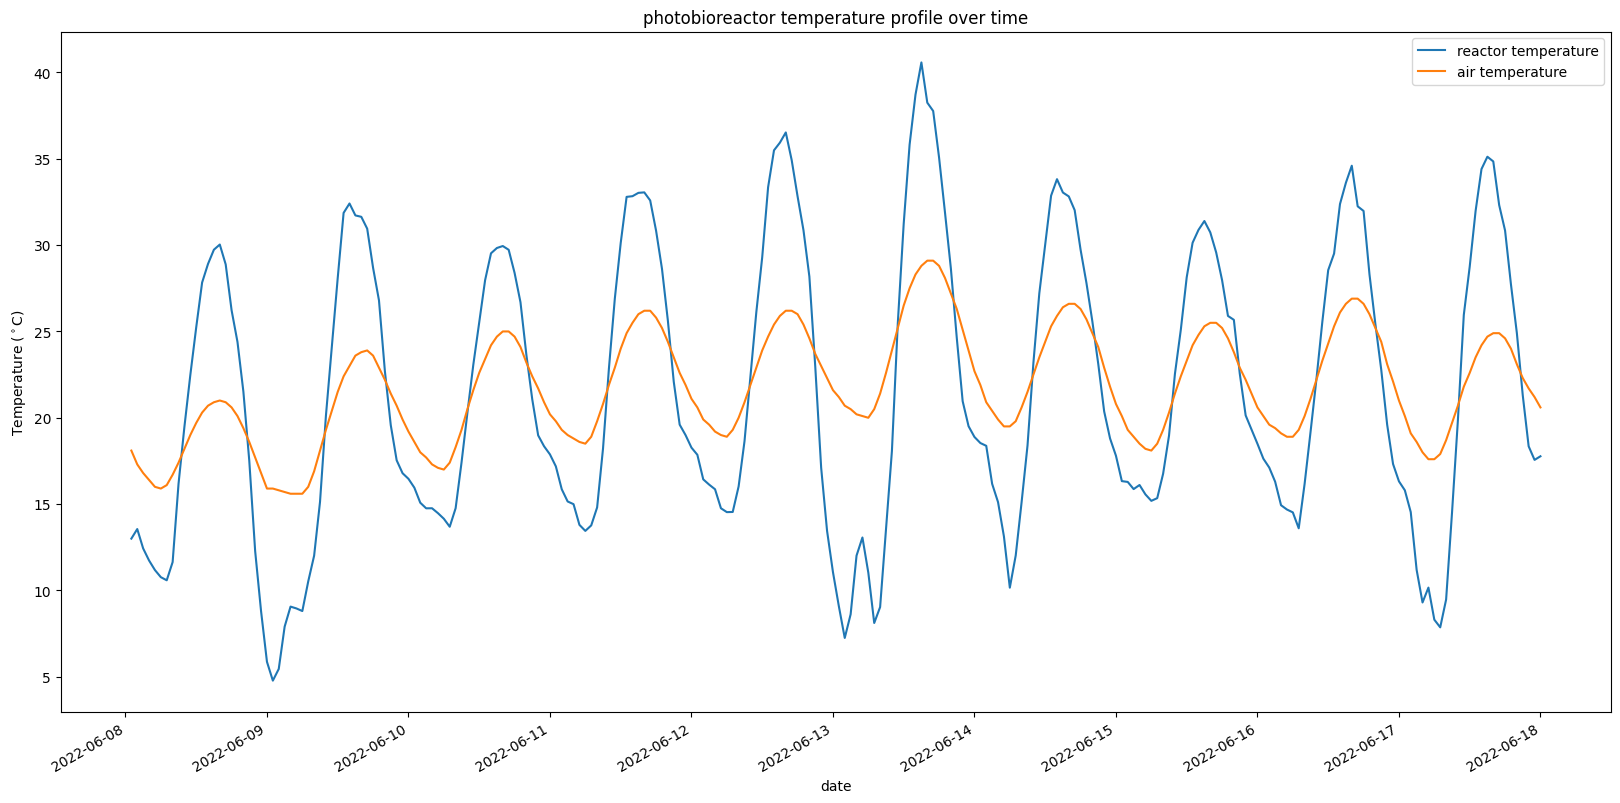

In [103]:
#solver
saved_fluxes=[] 
solver = integrate.solve_ivp (heat_bal,(t_span[0],t_span[-1]) ,y0, args = [0.01],t_eval=t_span, method='RK45')
#solver = integrate.solve_ivp (heat_bal,(t_span[0],t_span[-1]) ,y0, args = [0.01], method='RK45')
#solver = integrate.solve_ivp (heat_bal,[0, t_span[-1]], y0, t_eval=t_span, args = [0.0000001])
print(solver)
t_vals = solver.t
y_vals_check = solver.y
y_vals = y_vals_check[0]                #Did this to overcome the problem that the values are stored in a matrix. 
hours = t_span/(time_int*24)
air_temp = data.Ta[hours*24]
t_vals_days = 24/hours
time_values = data.date_time[t_span/time_int]
#Q_data = pd.DataFrame(Q_vals,time_values[1:])

##          plot results
plt.xlabel('date')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Temperature ($^\circ$C)')
plt.title('photobioreactor temperature profile over time')
plt.plot(time_values, y_vals-273.15,time_values,air_temp-273.15)
#plt.plot(time_values,y_vals[:-1]-273.15)
plt.gcf().autofmt_xdate()
plt.legend(['reactor temperature','air temperature'])



C:\Users\matth\AppData\Local\Temp\ipykernel_13160\911337925.py:2: RuntimeWarning: overflow encountered in power
  Q = sigma*tau_reactor*epsilon_reactor*L*2*math.pi*R_reactor*y**4
C:\Users\matth\AppData\Local\Temp\ipykernel_13160\4205292916.py:19: RuntimeWarning: invalid value encountered in add
  dxdt = (Q_direct_solar_rad+Q_diffuse_solar_rad+Q_ground_radiation+Q_medium_added+Q_air_infrared+Q_ground_reflected+Q_react_infrared+Q_broth_out+Q_evaporation+Q_convection+Q_aeration)/(rho_reactor*cp_reactor*V_reactor)


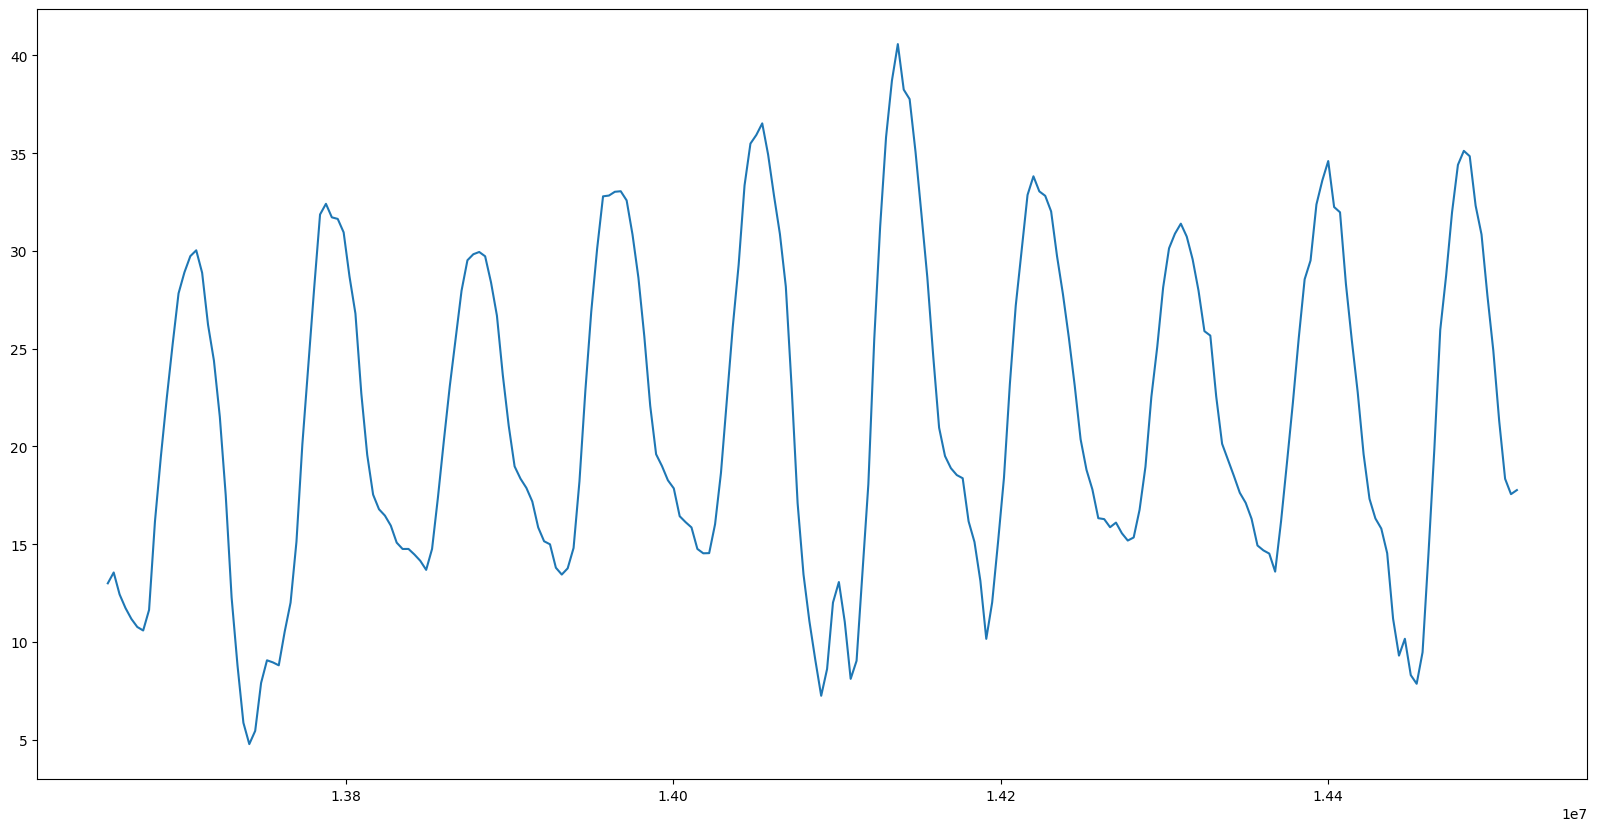

In [104]:
solver = integrate.solve_ivp (heat_bal,(t_span[0],t_span[-1]) ,y0, args = [0.01],t_eval=t_span, method='RK45')
t_vals = solver.t
y_vals_check = solver.y[0]
plt.plot(t_vals,y_vals_check-273.15)


240

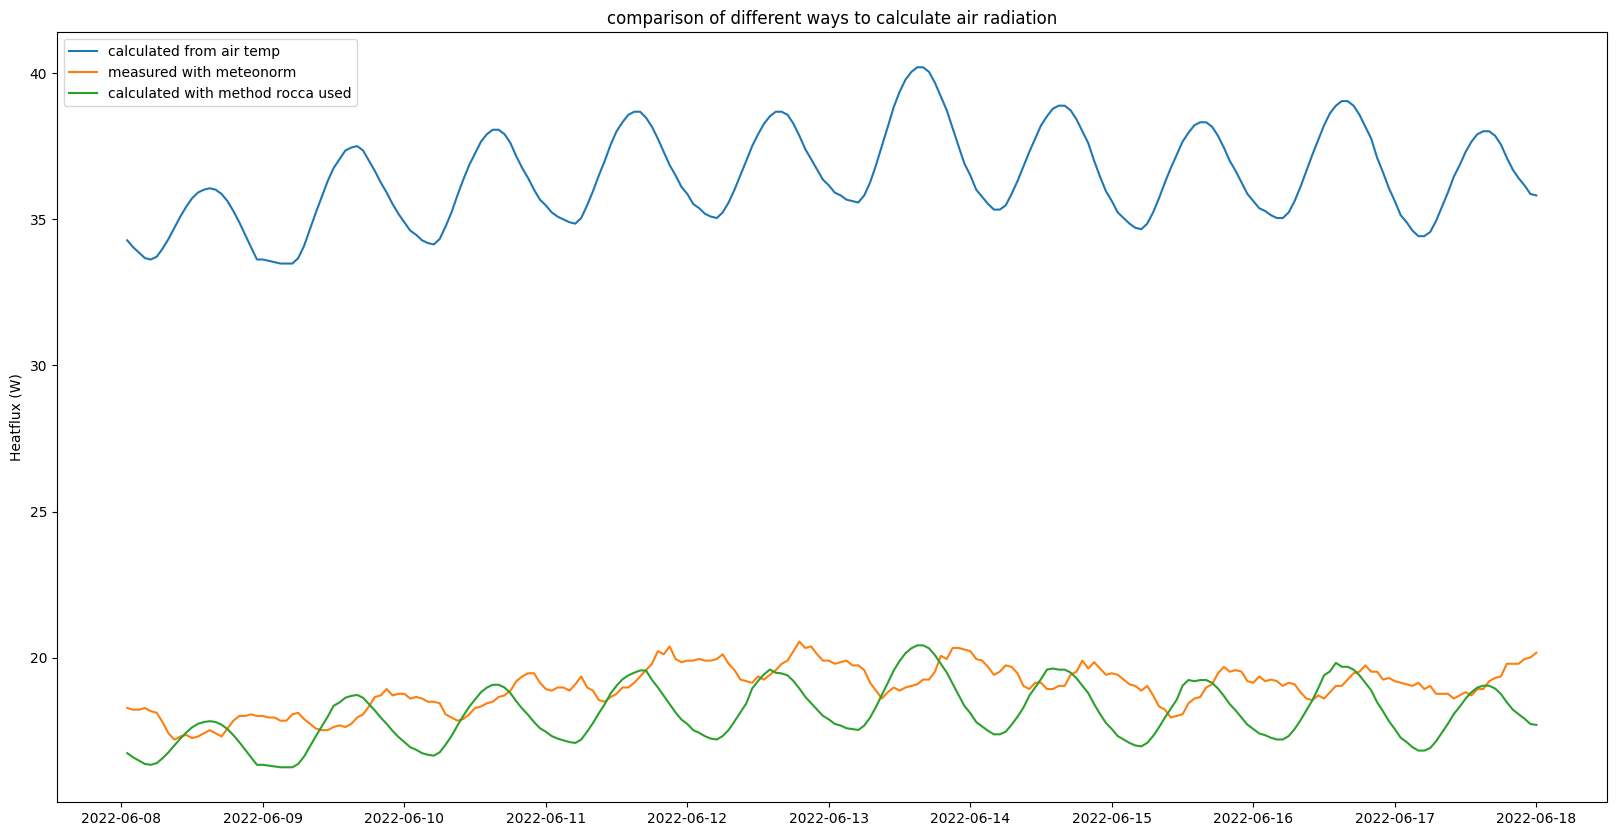

In [105]:
Q_air_calc = []
Q_air_meas = []
Q_air_rocca = []
clouds = []
wind = []
convection_vals = []
time_index = t_span[0]/3600
general_index = -1
for t in t_vals:
    time_index+=1
    general_index+=1
    try: 
        y = y_vals[general_index]
    except:
        pass
    try: 
        Q_air_calc.append(infrared_rad_air2(t,y,time_index))
        Q_air_meas.append(infrared_rad_air(t,y,time_index))
        Q_air_rocca.append(infrared_rad_air_rocca(t,y,time_index))
        clouds.append(data.N[time_index])
        wind.append(data.FF[time_index])
        convection_vals.append(convection(t,y,time_index))
    except:
        pass
if len(time_values)>len(Q_air_calc): #i think this only causes problem if the very last values of the year are used
    plt.plot(time_values[0:-1],Q_air_calc,time_values[0:-1],Q_air_meas,time_values[0:-1],Q_air_rocca)
else:
    plt.plot(time_values,Q_air_calc,time_values,Q_air_meas,time_values,Q_air_rocca)
plt.legend(['calculated from air temp','measured with meteonorm','calculated with method rocca used'])
plt.title('comparison of different ways to calculate air radiation' )
plt.axis.titlesize=1000
plt.ylabel('Heatflux (W)')
len(convection_vals)

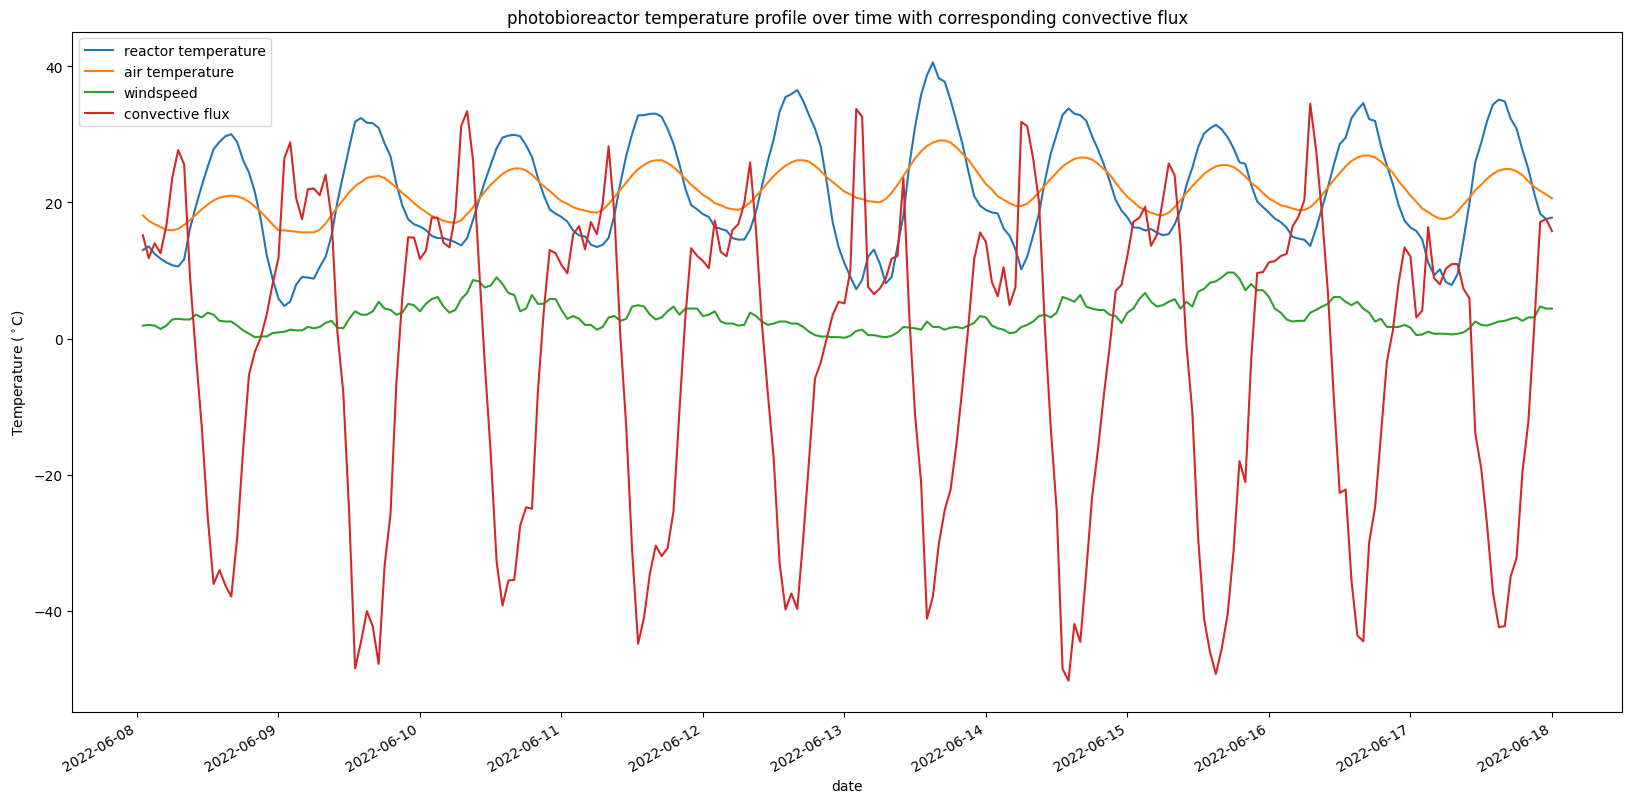

In [106]:
difference = air_temp-y_vals
plt.xlabel('date')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('photobioreactor temperature profile over time with corresponding convective flux')
if len(time_values)>len(Q_air_calc): #i think this only causes problem if the very last values of the year are used
    plt.plot(time_values, y_vals-273.15,time_values,air_temp-273.15,time_values[0:-1],wind,time_values[0:-1],convection_vals)
else:
    plt.plot(time_values, y_vals-273.15,time_values,air_temp-273.15,time_values,wind,time_values,convection_vals)
plt.legend(['reactor temperature','air temperature','windspeed','convective flux'])
plt.gcf().autofmt_xdate()

Text(0, 0.5, 'heat flux (W)')

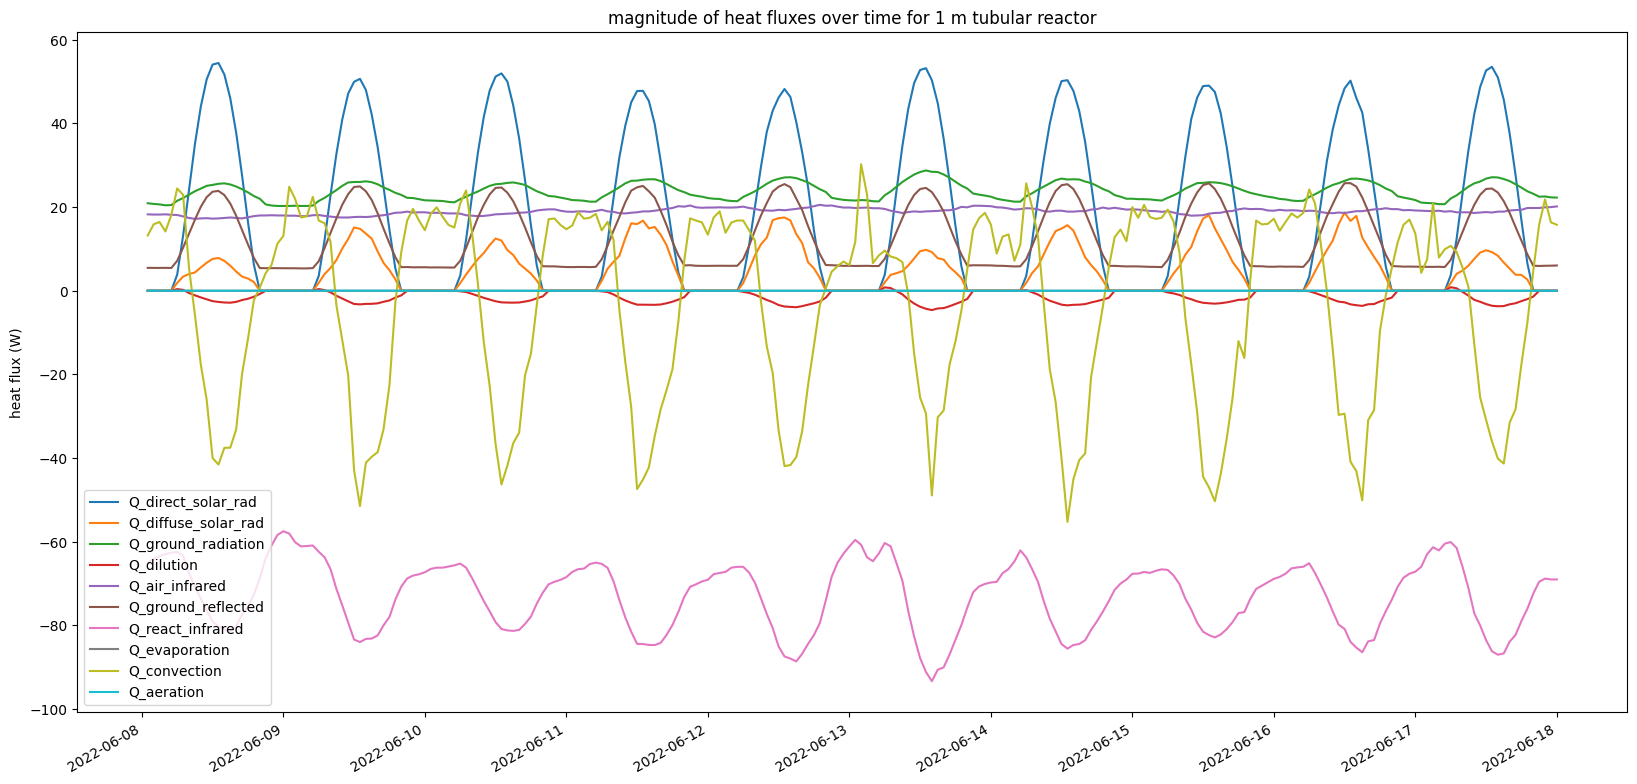

In [107]:
#reverse engineer the heat fluxes, can not extract them directly out of the heat balance function because the integration method
# integration method loops over heat balance multiple times per time step.
Q_data = np.zeros((len(t_vals)+1,10))
time_index = t_span[0]/3600
general_index = 0
for t in t_vals:
    general_index += 1
    time_index+=1
    try: 
        y = y_vals[general_index]
    except:
        pass
    #time_index+=1                       #during the calculation the previous y values are inputted, and the time index is of the next hour, in this way this reverse engineering compensates for that
    Q_react_infrared = reactor_infrared_radiation(t,y,time_index)
    Q_direct_solar_rad = direct_solar_rad(t,y,time_index)
    Q_diffuse_solar_rad = diffuse_solar_rad(t,y,time_index)
    Q_air_infrared = infrared_rad_air(t,y,time_index)
    Q_dilution  = flow_medium_in(t,y,time_index)+flow_harvest_out(t,y,time_index)
    Q_ground_radiation = ground_infrared_radiation(t,y,time_index)
    Q_evaporation = Q_evap(t,y,time_index)
    Q_ground_reflected = ground_reflected_rad(t,y,time_index)
    Q_convection =  convection(t,y,time_index)
    Q_aeration = aeration(t,y,time_index)
    #time_index-=1
    Q_data[general_index] = [Q_direct_solar_rad,Q_diffuse_solar_rad,Q_ground_radiation,Q_dilution,Q_air_infrared,Q_ground_reflected,Q_react_infrared,Q_evaporation,Q_convection,Q_aeration]
    
#Q_vals.append([Q_direct_solar_rad,Q_diffuse_solar_rad,Q_ground_radiation,Q_medium_added,Q_air_infrared,Q_ground_reflected,Q_react_infrared,Q_broth_out,Q_evaporation])
Q_data = Q_data[1:]
columnheader = ['Q_direct_solar_rad','Q_diffuse_solar_rad','Q_ground_radiation','Q_dilution','Q_air_infrared','Q_ground_reflected','Q_react_infrared','Q_evaporation','Q_convection','Q_aeration']
Fluxes = pd.DataFrame(Q_data, index= time_values,columns=columnheader)
Fluxes.describe()
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(time_values,Fluxes)
plt.legend(columnheader)
plt.gcf().autofmt_xdate()
plt.title('magnitude of heat fluxes over time for 1 m tubular reactor')
plt.ylabel('heat flux (W)')

In [108]:
Re_reactor = rho_reactor*flow_speed_reactor*(2*R_reactor)/mu_reactor
Re_air = rho_air*0*2*(R_reactor+glass_thickness)/mu_air 
Pr_air = cp_air*mu_air/k_air
Pr_reactor = cp_reactor*mu_reactor/k_reactor

empty_trial = []
empty_trial.append([2,4])
empty_trial.append([6,9])
#A = np.array(empty_trial)
#A[:,1]
rho_reactor*cp_reactor*V_reactor

12037.311852663144

np.float64(1.6)

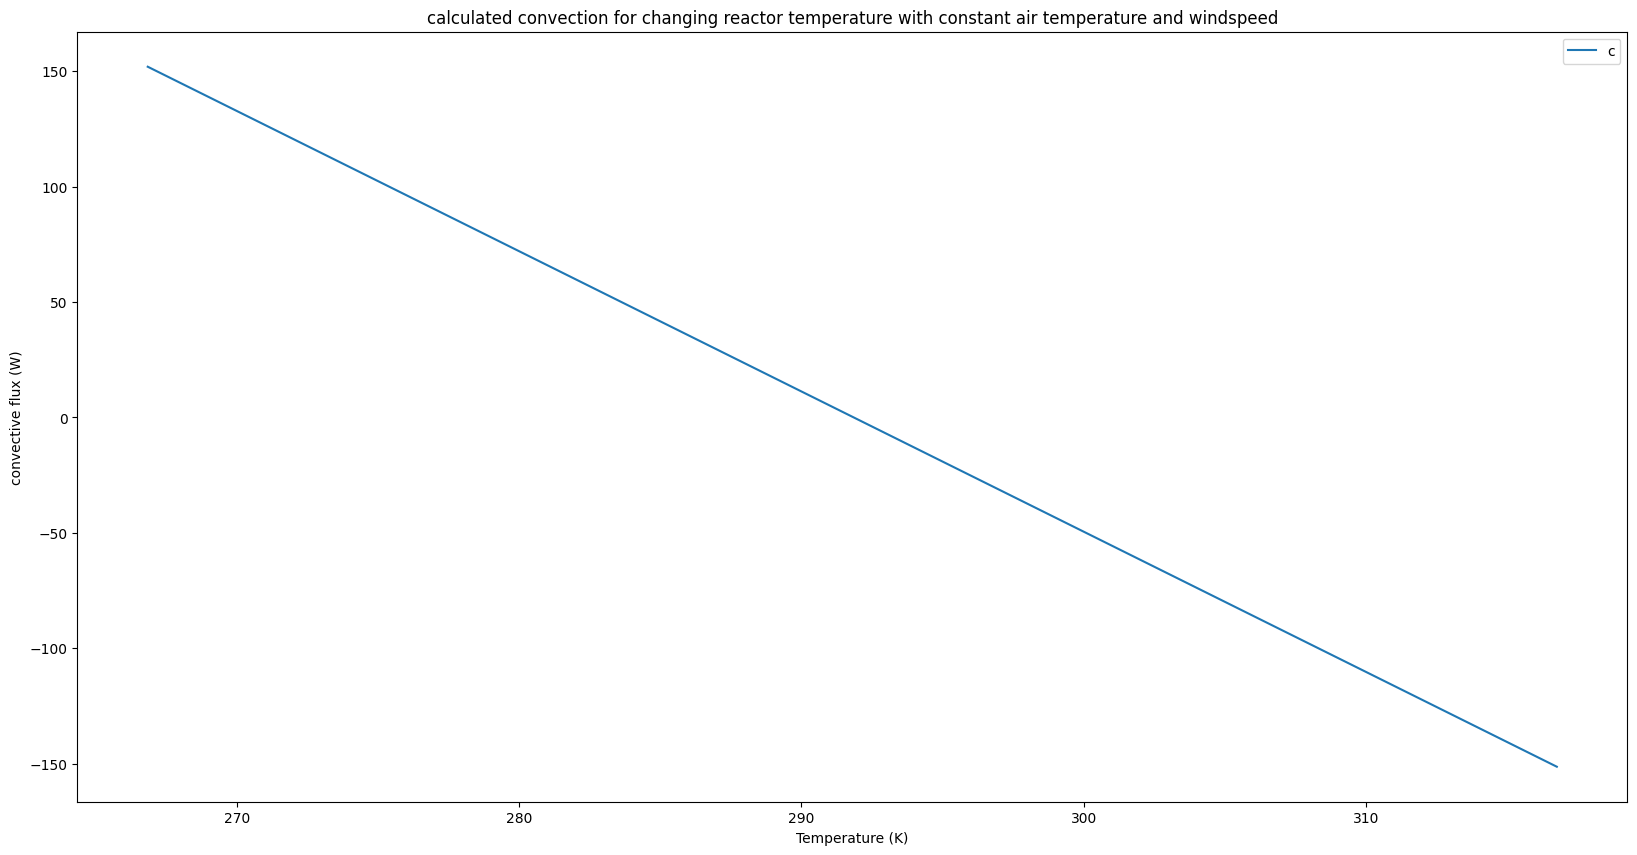

In [109]:
x_values = np.arange(data.Ta[15]-25,data.Ta[15]+25,0.1)
y_values = convection(15,x_values,15)
plt.plot(x_values,y_values)
plt.title('calculated convection for changing reactor temperature with constant air temperature and windspeed')
plt.legend('calculated convection')
plt.xlabel('Temperature (K)')
plt.ylabel('convective flux (W)')
data.FF[3]